In [38]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import median_absolute_error as mae
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import math

from keras.models import Sequential
from keras import initializers
from keras.models import load_model
from keras.layers import Dropout, Activation, Embedding, Convolution1D, MaxPooling1D, Input, Dense, BatchNormalization, Flatten, Reshape, Concatenate
from keras.layers.recurrent import LSTM, GRU
from keras.models import Model
from keras.optimizers import Adam, SGD, RMSprop
from keras import regularizers
from sklearn.model_selection import train_test_split
from tensorflow.keras import optimizers
from keras import metrics
from time import time

from tensorflow.keras.callbacks import EarlyStopping

early_stopping_monitor = EarlyStopping(patience=3)

In [2]:
df = pd.read_csv("../data/classifier/FinalScores/scores76.csv")
df = df[(df.vader!=0)]
df = df[(df.perc!=0)]
df = df[["vader","secscore","assoc","perc"]]

predictors = ['vader','secscore','assoc']
# predictors = ['vader','assoc']
target = ['perc']

print(df.head())

    vader  secscore  assoc  perc
11   0.67      0.27   0.13 -1.57
17  -0.13      0.00  -0.03  1.11
24   0.51      0.00   0.13  0.06
28   0.38      0.00   0.13 -0.37
30   0.42      0.00   0.13  1.45


In [46]:
X = df.drop(target, axis=1).values
Y = df[['perc']].values
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2,shuffle=True)


print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)
print(X.shape,Y.shape)

(6661, 3) (6661, 1)
(1666, 3) (1666, 1)
(8327, 3) (8327, 1)


In [47]:
def getAcc(losss,optimizerss,activationss,X_test,y_test,model):
  accs=0
  accs2=0
  for idx,row in enumerate(X_test):
    in1 = X_test[idx][0]
    in2 = X_test[idx][1]
    in3 = X_test[idx][2]
#     if(idx>200):
#       break
    
    input_val = np.asarray([[in1,in2,in3]])
#     input_val = np.asarray([[in1,in2]])
    output_val = y_test[idx][0]

    prediction = model.predict(input_val)
 
    if(prediction>0 and output_val>0):
      accs=accs+1
    elif(prediction<0 and output_val<0):
      accs=accs+1
    else:
      accs2=accs2+1

  print(losss,optimizerss,activationss,(accs/(accs2+accs))*100)



def getAcc2(model,X_test,y_test):
    predictions = model.predict(X_test)
    y_pred = []
    test_y = []
    for y in predictions.tolist():
        if y[0]>0:
            y_pred.append(1)
        else:
            y_pred.append(-1)

    for y in y_test.tolist():
        if y[0]>0:
            test_y.append(1)
        else:
            test_y.append(-1)

    print(accuracy_score(test_y,y_pred))

In [48]:
#compile the model
# lossss = ['mean_squared_error','mean_absolute_error','squared_hinge','logcosh','sparse_categorical_crossentropy','poisson'] 
# activationsss = ['elu','relu','softmax','selu','sigmoid','linear','tanh']

optimizersss = ['rmsprop','adam','sgd','adagrad','adadelta','adamax','nadam']
lossss = ['mean_squared_error','mean_absolute_error','squared_hinge','logcosh','poisson'] 
activationsss = ['elu','relu','softmax','selu','sigmoid','linear','tanh']

optimizer='adamax'
activation='selu'
losss='binary_crossentropy'

ts = time()

# for optimizer in optimizersss:
#   for losss in lossss:
#     for activation in activationsss:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(64, activation=activation,input_shape=(X_train.shape[1],)))
model.add(tf.keras.layers.Dense(132, activation=activation))
model.add(tf.keras.layers.Dense(64, activation=activation))
model.add(tf.keras.layers.Dense(1))
model.compile(loss=losss, optimizer=optimizer,metrics=[metrics.mae, metrics.categorical_accuracy,metrics.accuracy])


# Train the model
# train_model = model.fit(X[0:],Y[0:],epochs=20,verbose=True)

train_model = model.fit(X_train[0:],y_train[0:],validation_data=(X_test,y_test),epochs=20,verbose=True,callbacks=[early_stopping_monitor])
print("Took ", time() - ts)

Train on 6661 samples, validate on 1666 samples
Epoch 1/20
6661/6661 [==============================] - 2s 292us/sample - loss: -0.4842 - mean_absolute_error: 1.5670 - categorical_accuracy: 1.0000 - accuracy: 0.0000e+00 - val_loss: -0.7326 - val_mean_absolute_error: 1.6035 - val_categorical_accuracy: 1.0000 - val_accuracy: 0.0000e+00
Epoch 2/20
6661/6661 [==============================] - 0s 65us/sample - loss: -0.5198 - mean_absolute_error: 1.5658 - categorical_accuracy: 1.0000 - accuracy: 0.0000e+00 - val_loss: -0.7326 - val_mean_absolute_error: 1.6035 - val_categorical_accuracy: 1.0000 - val_accuracy: 0.0000e+00
Epoch 3/20
6661/6661 [==============================] - 0s 71us/sample - loss: -0.5198 - mean_absolute_error: 1.5658 - categorical_accuracy: 1.0000 - accuracy: 0.0000e+00 - val_loss: -0.7326 - val_mean_absolute_error: 1.6035 - val_categorical_accuracy: 1.0000 - val_accuracy: 0.0000e+00
Epoch 4/20
6661/6661 [==============================] - 0s 62us/sample - loss: -0.5198 - m

In [49]:
getAcc(optimizer,losss,activation,X_test,y_test,model)
getAcc2()
print("Took ", time() - ts)

adamax binary_crossentropy selu 53.00120048019208
Took  65.71901226043701


[-0.732638754180911, 1.6035084, 1.0, 0.0]
1666
0.5300120048019208


Text(0, 0.5, 'Predictions')

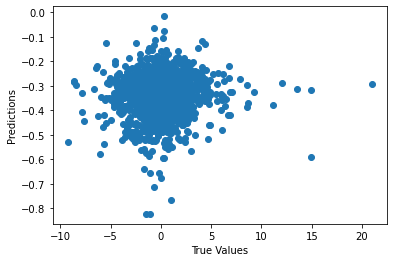

In [69]:
#Evaluate

# model = tf.keras.models.load_model('./models/model2.h5')

results = (model.evaluate(X_test,y_test, batch_size=10,verbose=False))
print(results)

plt.scatter(y_test, predictions)
plt.xlabel("True Values")
plt.ylabel("Predictions")

In [13]:
# save model
model.save("./models/model2.h5")

#load model
model = tf.keras.models.load_model('./models/model2.h5')

In [ ]:
# import csv

# # df2 = pd.read_csv('/content/testtt.csv')
# # for idx,

# input_val = ([[-0.232,-0.23]])
# input_val = np.asarray(input_val)

# prediction = model.predict(input_val)

# inputFileOpen = open('/content/test2.csv', "r", encoding="utf-8")

# inputFile = csv.reader(inputFileOpen)

# accs=0
# accs2=0
# for idx, row in enumerate(inputFile):
#   if idx==0:
#     continue
#   in1=float(row[0])
#   # if(in1==0.0 or in1==0):
#   #   continue

#   in2=float(row[1])

#   input_val = ([[in1,in2]])
#   output_val = float(row[2])
#   input_val = np.asarray(input_val)
#   prediction = model.predict(input_val)

#   if(prediction>0 and output_val>0):
#     accs=accs+1
#     # print("Correct: ",prediction,output_val)
#   elif(prediction<0 and output_val<0):
#     accs=accs+1
#     # print("Correct: ",prediction,output_val)
#   else:
#     accs2=accs2+1

# print((accs/(accs2+accs))*100)